In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Database connection settings
DB_CONFIG = {
    'database': 'employee_retention',
    'host': 'localhost',
    'port': 3306
}

# Establish connection
conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# Load data from database into pandas
df = pd.read_sql("SELECT * FROM employee_survey_2024;", conn)
conn.close()

/var/folders/k6/snr33vzx4w3_z2ldmlpmv83c0000gn/T/ipykernel_65162/3136216099.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM employee_survey_2024;", conn)


In [9]:
df

,employee_id,hiring_duration_weeks,hiring_satisfaction,onboarding_rating,recommend_company,job_satisfaction,reason_for_leaving,stayed
0,E001,6.2,7,3,7,7,None,1
1,E002,5.9,8,3,8,8,None,1
2,E003,6.5,7,3,7,7,None,1
3,E004,6.1,8,3,8,8,None,1
4,E005,5.8,8,3,8,8,None,1
...,...,...,...,...,...,...,...,...
95,E096,10.0,4,2,4,4,Work-life balance,0
96,E097,8.5,5,2,5,5,Career growth,0
97,E098,9.1,4,2,4,5,Management,0
98,E099,9.0,5,2,5,5,Compensation,0


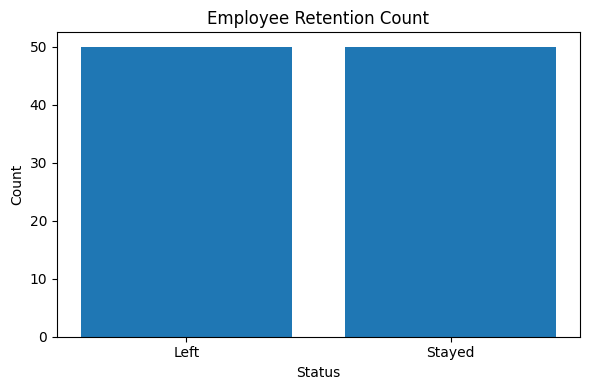

In [10]:
# Plot 1: Retention Count
retention_counts = df['stayed'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(['Left', 'Stayed'], retention_counts)
plt.title('Employee Retention Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



/var/folders/k6/snr33vzx4w3_z2ldmlpmv83c0000gn/T/ipykernel_65162/3773837544.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([left, stayed], labels=['Left', 'Stayed'])


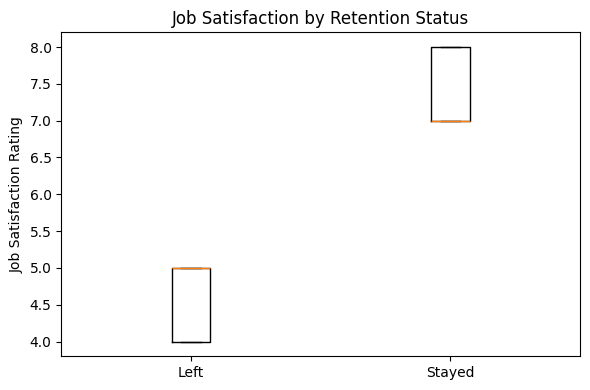

In [12]:
# Plot 2: Job Satisfaction by Retention
left = df[df['stayed'] == 0]['job_satisfaction']
stayed = df[df['stayed'] == 1]['job_satisfaction']
plt.figure(figsize=(6,4))
plt.boxplot([left, stayed], labels=['Left', 'Stayed'])
plt.title('Job Satisfaction by Retention Status')
plt.ylabel('Job Satisfaction Rating')
plt.tight_layout()
plt.show()

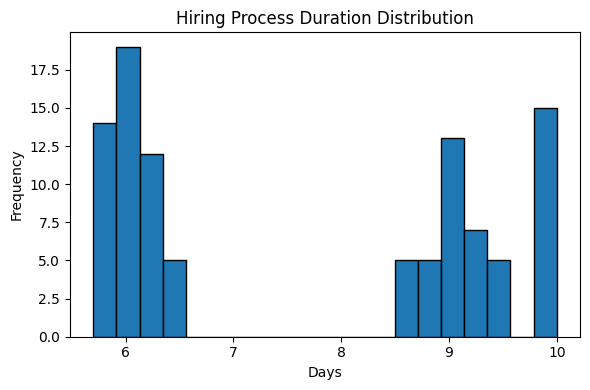

In [14]:
# Plot 3: Hiring Process Duration Histogram
plt.figure(figsize=(6,4))
plt.hist(df['hiring_duration_weeks'], bins=20, edgecolor='black')
plt.title('Hiring Process Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Net Promoter Score (NPS): -50.00


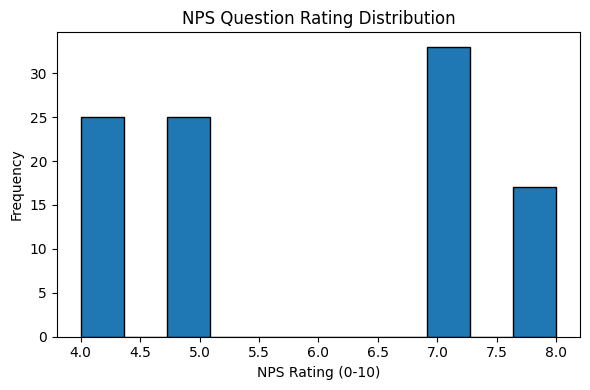

In [18]:
# Calculate Net Promoter Score (NPS)
# Assume 'nps_question_rating' is a column with values 0-10 in df

promoters = df[df['recommend_company'] >= 9]
detractors = df[df['recommend_company'] <= 6]
total_responses = len(df[df['recommend_company'].notnull()])

nps_score = ((len(promoters) - len(detractors)) / total_responses) * 100
print(f"Net Promoter Score (NPS): {nps_score:.2f}")

# Plot NPS Score Distribution
plt.figure(figsize=(6,4))
plt.hist(df['recommend_company'], bins=11, edgecolor='black')
plt.title('NPS Question Rating Distribution')
plt.xlabel('NPS Rating (0-10)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
  